# Exercise 1a

## 1. Monte-Carlo Simulation

### 1.1 Data Creation and Visualization
#### Method
- Let X be a random variable whose distribution can be described by the cumulative distribution function $F_{x}$.
- We want to generate values of X which are distributed according to this distribution.

The inverse transform sampling method works as follows:

1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Find the inverse of the desired CDF, e.g. $F^{-1}_{X}(x)$.
3. Compute $X = F^{-1}_{X}(u)$. The computed random variable $X$ has distribution $F_{X}(x)$.
---
Information taken from [Wikipedia](https://en.wikipedia.org/wiki/Inverse_transform_sampling)

#### Application
Sampling $p(Y=0) = p(Y=1) = \frac{1}{2}$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Round random number to 1 if it is $\geq$ 0.5, otherwise round it to 0.

Sampling $p(X=x|Y=0) = 2-2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2-2x\,dx $$
$$F_{X}(x) = 2x-x^{2} $$
$$F^{-1}_{X}(x) = 1-\sqrt{1-x}, 1+\sqrt{1-x}$$

3. Compute $X = 1-\sqrt{1-u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2-2x$

Sampling $p(X=x|Y=1) = 2x$
1. Generate a random number u from the standard uniform distribution in the interval $[0,1]$.
2. Calculate inversion $F^{-1}_{X}(x)$
$$F_{X}(x) = \int_{0}^{x}  2x\,dx $$
$$F_{X}(x) = x^{2} $$
$$F^{-1}_{X}(x) = -\sqrt{x}, \sqrt{x}$$

3. Compute $X = \sqrt{u}$, as the other case is not in range of $[0,1]$. The computed random variable $X$ has distribution $2x$

In [140]:
import numpy.random as random
import numpy as np
import math as math

In [141]:
# Returns an Array [[N/2 samples for p(X|Y=0)], [N/2 samples for p(X|Y=1)]]
def create_data (N):
    p0 = [1-(math.sqrt(1-random.random())) for element in range(math.floor(N/2))]
    p1 = [math.sqrt(random.random()) for element in range(math.floor(N/2))]
    return [p0, p1]

In [142]:
data = create_data(1000000)

In [143]:
import matplotlib.pyplot as plt

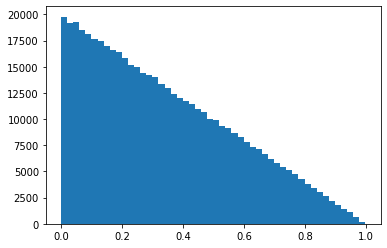

In [144]:
plt1 = plt.hist(data[0], bins=50)

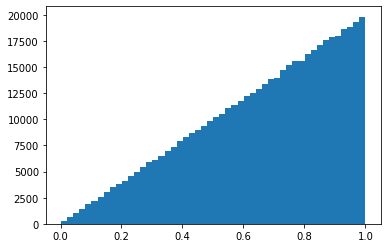

In [145]:
plt2 = plt.hist(data[1], bins=50)

In [146]:
def fA(X,x_t):
    return int(X >= x_t)

def fB(X,x_t):
    return int(X < x_t)

In [147]:
def test(M, t):
    errors = []
    for i in range(10):
        data = create_data(M)
        data0 = data[0]
        data1 = data[1]

        data0thresholds = [fA(elem, t) for elem in data0]
        data0ones = list(filter(lambda elem: elem == 1, data0thresholds))
        data0error = len(data0ones)

        data1thresholds = [fA(elem, t) for elem in data1]
        data1zeros = list(filter(lambda elem: elem == 0, data1thresholds))
        data1error = len(data1zeros)

        error = (data0error + data1error) / (len(data0) + len(data1))
        errors.append(error)
    return errors

In [148]:
def mean_error(error_rates):
    return sum(error_rates) / len(error_rates)

def standard_deviation_error(mean_error, error_rates):
    return sum([abs(mean_error - elem) for elem in error_rates]) / len(error_rates)

def errors(error_rates):
    meanError = mean_error(error_rates)
    standardDeviationError = standard_deviation_error(meanError, error_rates)
    return [meanError, standardDeviationError]

In [156]:
def experiment(t):
   # Tests for threshold = t
    error_rates10 = test(10, t)
    errors10 = errors(error_rates10)

    error_rates100 = test(100, t)
    errors100 = errors(error_rates100)

    error_rates1000 = test(1000, t)
    errors1000 = errors(error_rates1000)

    error_rates10000 = test(10000, t)
    errors10000 = errors(error_rates10000)

    plt.plot([10, 100, 1000, 10000], [errors10[0], errors100[0], errors1000[0], errors10000[0]], label="t = "+str(t))
    plt.errorbar([10, 100, 1000, 10000], [errors10[0], errors100[0], errors1000[0], errors10000[0]], yerr=[errors10[1], errors100[1], errors1000[1], errors10000[1]])
    plt.legend(loc="upper right")
    plt.xscale("log")

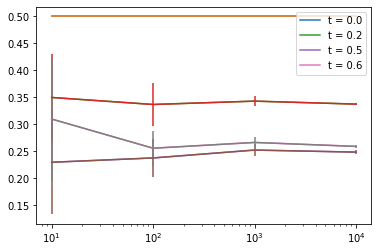

In [185]:
experiment(0.0)
experiment(0.2)
experiment(0.5)
experiment(0.6)